## 차원의 저주
- 차원이 증가함에 따라 필요한 데이터의 양과 시간 복잡도가 기하급수적으로 증가하는 문제를 의미함
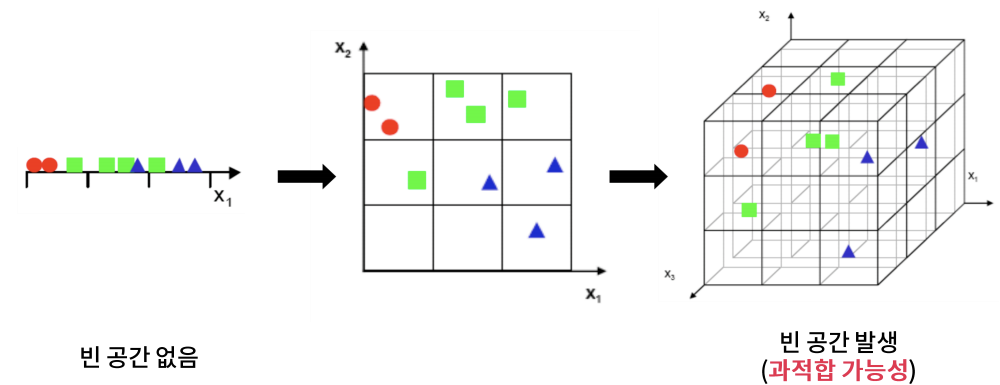

## 차원을 줄여야 하는 이유
- 차원이 증가함에 따라 모델 학습 시간이 정비례하게 증가함
- 차원이 증가하면 각 결정 공간에 포함되는 샘플 수가 적어져, 과적합으로 이어져 성능 저하가 발생할 수 있음

In [1]:
import os
import pandas as pd
os.chdir(r'C:\Users\신상훈\Desktop\preprocessing\part-5.-머신러닝-모델의-성능-향상을-위한-전처리\5. 머신러닝 모델의 성능 향상을 위한 전처리\데이터')

In [2]:
df = pd.read_csv('appendicitis.csv')

In [3]:
df.head()

,At1,At2,At3,At4,At5,At6,At7,Class
0,0.213,0.554,0.207,0.000,0.000,0.749,0.220,1
1,0.458,0.714,0.468,0.111,0.102,0.741,0.436,1
2,0.102,0.518,0.111,0.056,0.022,0.506,0.086,1
3,0.187,0.196,0.105,0.056,0.029,0.133,0.085,1
4,0.236,0.804,0.289,0.111,0.066,0.756,0.241,1


In [4]:
# 특징과 라벨 분리
X = df.drop('Class', axis =1)
Y = df['Class']

In [5]:
# 학습데이터와 평가 데이터 분리
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X,Y)

In [15]:
# 특징에 따른 SVM 모델 테스트 함수 작성
from sklearn.svm import SVC
from sklearn.metrics import f1_score

def feature_test(Train_X, Test_X, Train_Y, Test_Y, features):
    s_Train_X = Train_X[features]
    s_Test_X = Test_X[features]
    
    model = SVC().fit(s_Train_X, Train_Y)
    pred_Y = model.predict(s_Test_X)    
    return f1_score(Test_Y, pred_Y)

base_score = feature_test(Train_X, Test_X, Train_Y, Test_Y, Train_X.columns) # 모든 특징을 썼을 때의 점수
print(base_score)

0.4


In [16]:
import itertools
c_list = list(range(1, len(Train_X.columns)))
outperform_ratio_list = []
best_score = 0

for c in range(1, len(Train_X.columns)): # c = 선택한 특징 개수
    print(c)
    c_num = 0 # 특징을 c개 뽑았을 때, 원본보다 성능이 좋은 경우
    c_dem = 0 # 특징을 c개 뽑는 경우의 수
    
    for features in itertools.combinations(Train_X.columns, c):
        score = feature_test(Train_X, Test_X, Train_Y, Test_Y, list(features)) # itertools은 tuple 형태로 값을 반환해서 형변환을 해준 것
        if score > best_score:
            best_score = score
            best_feature = list(features)
        
        if score > base_score:
            c_num += 1
        c_dem += 1
    
    outperform_ratio_list.append(c_num / c_dem)

1
2
3
4
5
6


<BarContainer object of 6 artists>

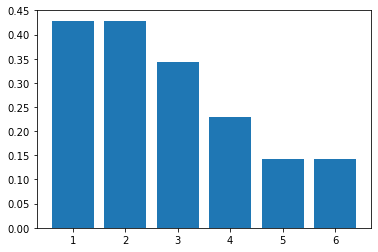

In [17]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.bar(c_list, outperform_ratio_list)

In [18]:
best_feature, best_score

(['At1', 'At4'], 0.6666666666666666)